### **Week 3**

**DATASET** <br>
https://raw.githubusercontent.com/NathaliaMinoque/dataset/refs/heads/main/MBA.csv <br>



**METADATA** <br>
application_id: Unique identifier for each application <br>
gender: Applicant's gender (Male, Female)<br>
international: International student (TRUE/FALSE)<br>
gpa: Grade Point Average of the applicant (on 4.0 scale)<br>
major: Undergraduate major (Business, STEM, Humanities)<br>
race: Racial background of the applicant (e.g., White, Black, Asian, Hispanic, Other / null: international student)<br>
gmat: GMAT score of the applicant (800 points)<br>
work_exp: Number of years of work experience (Year)<br>
work_industry: Industry of the applicant's previous work experience (e.g., Consulting, Finance, Technology, etc.)<br>
admission: Admission status (Admit, Waitlist, Null: Deny)<br>

In [202]:
#Import Library
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.preprocessing import LabelEncoder

1. display 5 columns from dataset

In [203]:
#1
df=pd.read_csv("https://raw.githubusercontent.com/NathaliaMinoque/dataset/refs/heads/main/MBA.csv")
df.head()


,application_id,gender,international,gpa,major,race,gmat,work_exp,work_industry,admission
0,1,Female,False,3.30,Business,Asian,620.0,3.0,Financial Services,Admit
1,2,Male,False,3.28,Humanities,Black,680.0,5.0,Investment Management,NaN
2,3,Female,True,3.30,Business,NaN,710.0,5.0,Technology,Admit
3,4,Male,False,3.47,STEM,Black,690.0,6.0,Technology,NaN
4,5,Male,False,3.35,STEM,Hispanic,590.0,5.0,Consulting,NaN


2. display the info column and conclude what the insight is from that column

In [204]:
#2
df.info()

#conclusion
print("Conclusion:")


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6194 entries, 0 to 6193
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   application_id  6194 non-null   int64  
 1   gender          6194 non-null   object 
 2   international   6194 non-null   bool   
 3   gpa             6194 non-null   float64
 4   major           6194 non-null   object 
 5   race            4352 non-null   object 
 6   gmat            6194 non-null   float64
 7   work_exp        6194 non-null   float64
 8   work_industry   6194 non-null   object 
 9   admission       1000 non-null   object 
dtypes: bool(1), float64(3), int64(1), object(5)
memory usage: 441.7+ KB
Conclusion:


Dataframe ini berisi 6194 baris dengan 10 kolom yang mencakup informasi terkait aplikasi seperti ID aplikasi, gender, status internasional, GPA, jurusan, ras, nilai GMAT, pengalaman kerja, industri pekerjaan, dan status penerimaan. Sebagian besar kolom memiliki data lengkap, kecuali kolom race dengan 1842 nilai kosong dan admission dengan 5194 nilai kosong. Data ini terdiri dari berbagai tipe seperti integer, float, object (teks), dan boolean, serta menggunakan memori sebesar 441.7 KB. Data ini dapat digunakan untuk menganalisis faktor-faktor yang mempengaruhi penerimaan aplikasi, meskipun beberapa kolom memiliki banyak missing values.


3. display the number of each unique value in the race and admission columns (including NaN)

In [205]:
#3a

print(df['admission'].value_counts())

admission
Admit       900
Waitlist    100
Name: count, dtype: int64


In [206]:
#3b
print(df['race'].value_counts())

race
White       1456
Asian       1147
Black        916
Hispanic     596
Other        237
Name: count, dtype: int64


In [207]:
print(df['work_industry'].value_counts())

work_industry
Consulting               1619
PE/VC                     907
Technology                716
Nonprofit/Gov             651
Investment Banking        580
Financial Services        451
Other                     421
Health Care               334
Investment Management     166
CPG                       114
Real Estate               111
Media/Entertainment        59
Retail                     33
Energy                     32
Name: count, dtype: int64


4. fill NaN values in admission column to "deny" and null values in in race column to "other"

In [208]:
#4
df['admission'].fillna('Deny', inplace=True)
df['race'].fillna('Other', inplace=True)

<ipython-input-208-4c52867b0f1c>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['admission'].fillna('Deny', inplace=True)
<ipython-input-208-4c52867b0f1c>:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 

5. recheck missing value

In [209]:
#5
df.isnull().sum()

,0
application_id,0
gender,0
international,0
gpa,0
major,0
race,0
gmat,0
work_exp,0
work_industry,0
admission,0


6. drop application_id column

In [210]:
# 6
df.drop('application_id', axis=1, inplace=True)
df.head()

,gender,international,gpa,major,race,gmat,work_exp,work_industry,admission
0,Female,False,3.30,Business,Asian,620.0,3.0,Financial Services,Admit
1,Male,False,3.28,Humanities,Black,680.0,5.0,Investment Management,Deny
2,Female,True,3.30,Business,Other,710.0,5.0,Technology,Admit
3,Male,False,3.47,STEM,Black,690.0,6.0,Technology,Deny
4,Male,False,3.35,STEM,Hispanic,590.0,5.0,Consulting,Deny


7. show describe column and conclude what the insight is from that column

In [211]:
#7
df.describe()


#conclusion


,gpa,gmat,work_exp
count,6194.000000,6194.000000,6194.000000
mean,3.250714,651.092993,5.016952
std,0.151541,49.294883,1.032432
min,2.650000,570.000000,1.000000
25%,3.150000,610.000000,4.000000
50%,3.250000,650.000000,5.000000
75%,3.350000,680.000000,6.000000
max,3.770000,780.000000,9.000000


Dari data statistik di atas, terlihat bahwa rata-rata GPA pelamar adalah 3.25 dengan rentang nilai antara 2.65 hingga 3.77. Nilai GMAT rata-rata adalah 651, dengan nilai terendah 570 dan tertinggi 780. Untuk pengalaman kerja, rata-rata pelamar memiliki 5 tahun pengalaman, dengan minimum 1 tahun dan maksimum 9 tahun. Mayoritas pelamar berada di kuartil kedua dan ketiga untuk GPA (3.15–3.35), GMAT (610–680), dan pengalaman kerja (4–6 tahun), menunjukkan bahwa sebagian besar pelamar memiliki kualifikasi di atas rata-rata yang diharapkan.

8. make a visualization to analyze admission status based on major and explain the conclusions

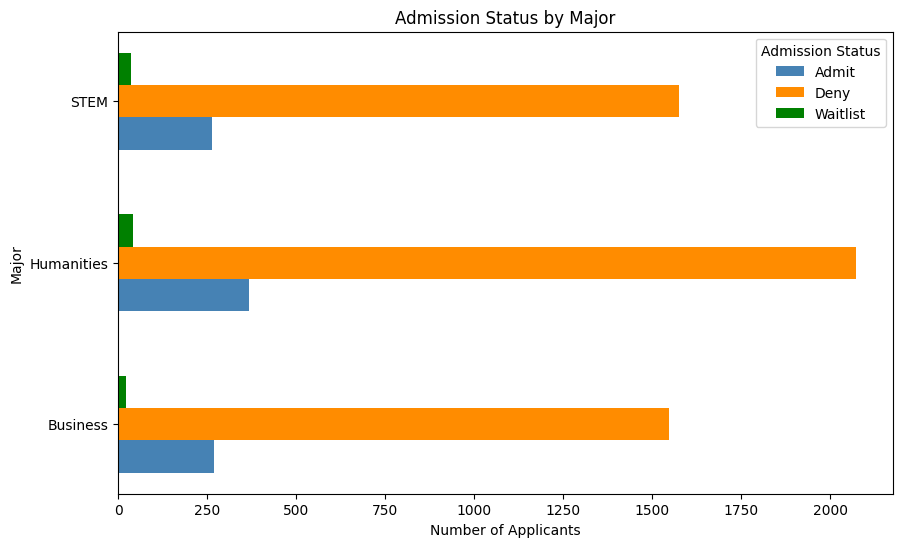

In [212]:

#8
df_major = df.groupby('major')['admission'].value_counts().unstack()

plt.figure(figsize=(10, 6))
y_positions = np.arange(len(df_major.index))
bar_width = 0.2

# Membuat barchart yang tidak bertumpuk (unstacked)
plt.barh(y_positions, df_major['Admit'], height=bar_width, label='Admit', color='steelblue', align='center')
plt.barh(y_positions + bar_width, df_major['Deny'], height=bar_width, label='Deny', color='darkorange', align='center')
plt.barh(y_positions + 2 * bar_width, df_major['Waitlist'], height=bar_width, label='Waitlist', color='green', align='center')

# Menambahkan label sumbu dan judul
plt.yticks(y_positions + bar_width, df_major.index)
plt.title('Admission Status by Major')
plt.xlabel('Number of Applicants')
plt.ylabel('Major')

# Menambahkan legenda
plt.legend(title='Admission Status', loc='upper right')

# Menampilkan grafik
plt.show()

9. make a visualization to analyze the admissions in each major based on gender and explain the conclusions

Text(0, 0.5, 'Major')

<Figure size 1000x600 with 0 Axes>

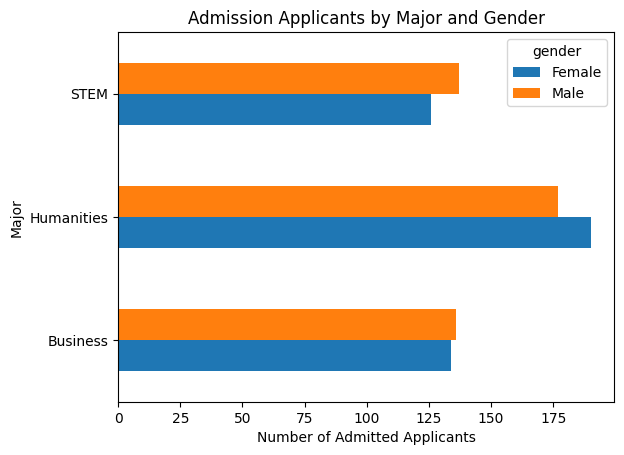

In [213]:
#9
df_gender = df[df['admission'] == 'Admit'].groupby(['major', 'gender'])['gender'].count().unstack()

plt.figure(figsize=(10, 6))
df_gender.plot(kind='barh')
plt.title('Admission Applicants by Major and Gender')
plt.xlabel('Number of Admitted Applicants')
plt.ylabel('Major')


10. create your own insightful visualization and explain it in at least 2 sentences

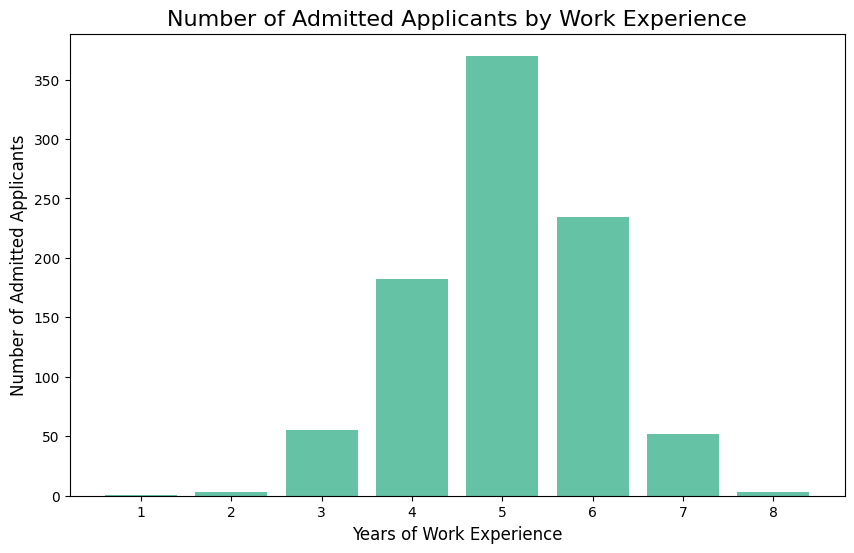

In [214]:
#10
admitted_counts = df[df['admission'] == 'Admit']['work_exp'].value_counts()

# Create a bar chart
plt.figure(figsize=(10, 6))
plt.bar(admitted_counts.index, admitted_counts.values, color='#66c2a5')
plt.title('Number of Admitted Applicants by Work Experience', fontsize=16)
plt.xlabel('Years of Work Experience', fontsize=12)
plt.ylabel('Number of Admitted Applicants', fontsize=12)
plt.xticks(admitted_counts.index)  # Set x-ticks to be the work experience values


# Display the plot
plt.show()




The histogram illustrates that the majority of admitted applicants have around 5 years of work experience, as evidenced by the tallest bar exceeding 350 admitted applicants, indicating that substantial work experience is a favorable trait in the admissions process. Conversely, fewer applicants with 1 to 3 years of experience are admitted, suggesting that applicants with more professional experience may enhance their chances of acceptance into the program.

11. create your own insightful visualization and explain it in at least 2 sentences

/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


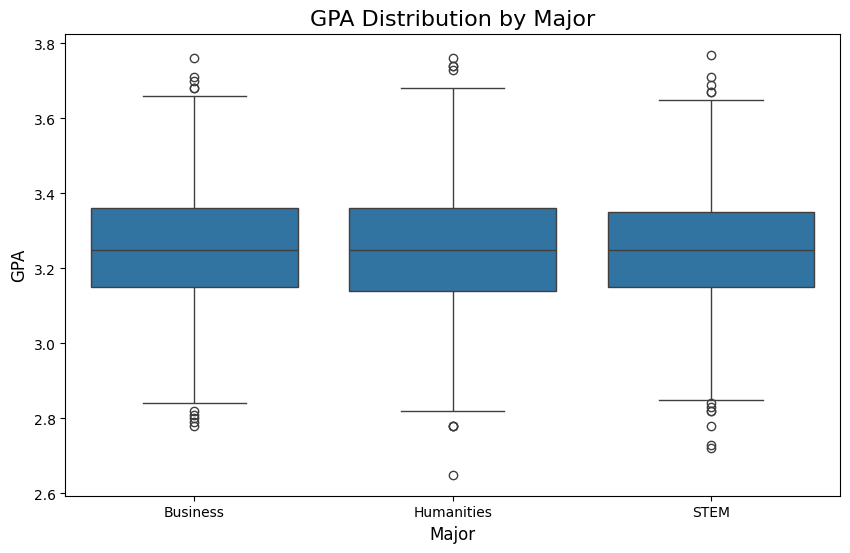

In [215]:
#11
plt.figure(figsize=(10, 6))
sns.boxplot(x='major', y='gpa', data=df)
plt.title('GPA Distribution by Major', fontsize=16)
plt.xlabel('Major', fontsize=12)
plt.ylabel('GPA', fontsize=12)

plt.show()


The box plot illustrates the GPA distribution across three majors: Business, Humanities, and STEM, highlighting the median GPA, interquartile range, and the presence of outliers in each major. Overall, while the median GPAs for all three majors are relatively similar, the plot reveals variations in the spread and presence of outliers, indicating differing levels of academic performance and consistency among students in each field.

12. encode categorical columns and display the results

In [216]:

#12a
#encode X
label_encoder = LabelEncoder()

# Encode categorical columns
categorical_cols = ['gender','international','major', 'race', 'work_industry']
for col in categorical_cols:
    df[col] = label_encoder.fit_transform(df[col])

df.head()


,gender,international,gpa,major,race,gmat,work_exp,work_industry,admission
0,0,0,3.30,0,0,620.0,3.0,3,Admit
1,1,0,3.28,1,1,680.0,5.0,6,Deny
2,0,1,3.30,0,3,710.0,5.0,13,Admit
3,1,0,3.47,2,1,690.0,6.0,13,Deny
4,1,0,3.35,2,2,590.0,5.0,1,Deny


In [217]:
#12b
#encode y

admission_dict = {'Admit': 0, 'Deny': 1, 'Waitlist': 2}
df['admission'] = df['admission'].replace(admission_dict)
df.head()


<ipython-input-217-67cb881e94ea>:5: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['admission'] = df['admission'].replace(admission_dict)


,gender,international,gpa,major,race,gmat,work_exp,work_industry,admission
0,0,0,3.30,0,0,620.0,3.0,3,0
1,1,0,3.28,1,1,680.0,5.0,6,1
2,0,1,3.30,0,3,710.0,5.0,13,0
3,1,0,3.47,2,1,690.0,6.0,13,1
4,1,0,3.35,2,2,590.0,5.0,1,1


13. create a heatmap to see the correlation and explain the conclusion

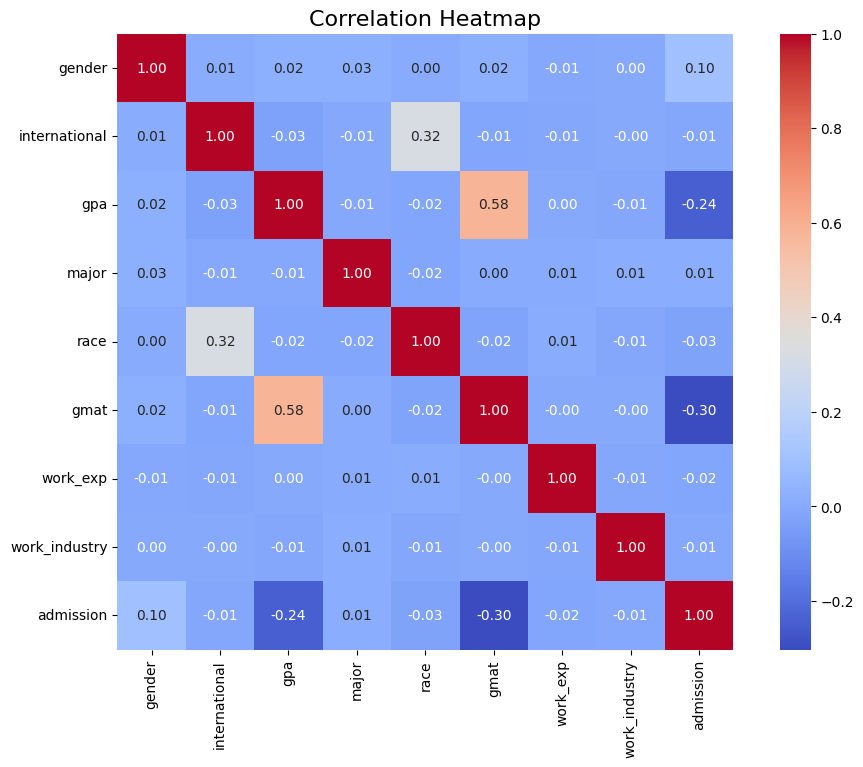

In [218]:

correlation_matrix = df.corr()

# Create a heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm', square=True, cbar=True)
plt.title('Correlation Heatmap', fontsize=16)
plt.show()

corelation heatmap menunjukkan hubungan signifikan antara variabel dalam data penerimaan universitas. Skor GMAT memiliki korelasi positif yang sangat kuat dengan status penerimaan, mencerminkan perannya sebagai faktor utama dalam keputusan penerimaan. Terdapat juga korelasi positif sedang antara GPA dan GMAT, yang mengindikasikan bahwa siswa dengan IPK tinggi cenderung berprestasi baik di GMAT. Namun, mengejutkan, terdapat korelasi negatif antara GPA dan penerimaan, menunjukkan bahwa GPA mungkin bukan prediktor yang kuat untuk penerimaan universitas. Selain itu, korelasi negatif antara pengalaman kerja dan skor GMAT menunjukkan bahwa individu dengan lebih banyak pengalaman kerja cenderung memiliki skor GMAT yang lebih rendah, menggarisbawahi pentingnya evaluasi holistik dalam proses penerimaan.

**Challenge! Get Extra 10 Points**<br>

get extra 10 points if you can help Lisa predict whether she will be accepted or not.
Lisa is a local student, Lisa's gpa is the average of all applicants, during her undergraduate Lisa studied entrepreneurship, Lisa has an Asian race, gmat score 580, has worked from 2018 to 2020 as a finance.

In [226]:
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

# Separate features (X) and target variable (y)
X = df.drop('admission', axis=1)
y = df['admission']

# Create Lisa's data
lisa_data = pd.DataFrame({
    'gender': ['Female'],
    'international': [False],
    'gpa': [df['gpa'].mean()],
    'major': ['Entrepreneurship'],  # Assuming Entrepreneurship is a major
    'race': ['Asian'],
    'gmat': [580],
    'work_exp': [2],
    'work_industry': ['Finance']
})

# Concatenate Lisa's data with the original data for encoding
X_combined = pd.concat([X, lisa_data], ignore_index=True)

# Ensure boolean values are converted to integers (0/1)
X_combined['international'] = X_combined['international'].astype(int)

# Encode categorical features in X_combined
le_gender = LabelEncoder()
le_major = LabelEncoder()
le_race = LabelEncoder()
le_work_industry = LabelEncoder()

X_combined['gender'] = le_gender.fit_transform(X_combined['gender'].astype(str))
X_combined['major'] = le_major.fit_transform(X_combined['major'].astype(str))
X_combined['race'] = le_race.fit_transform(X_combined['race'].astype(str))
X_combined['work_industry'] = le_work_industry.fit_transform(X_combined['work_industry'].astype(str))

# Split the combined data back into X and lisa_data
X = X_combined[:-1]
lisa_data = X_combined[-1:]

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=10)

# Create and train the Random Forest model
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

# Make prediction for Lisa
lisa_prediction = model.predict(lisa_data)

# Decode the prediction
if lisa_prediction[0] == 1:
    print("Prediction for Lisa: Admit")
else:
    print("Prediction for Lisa: Deny")

# Evaluate the model (Accuracy)
from sklearn.metrics import accuracy_score
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")

Prediction for Lisa: Admit
Accuracy: 0.8353510895883777
